---
## 1️⃣ Data Loading & Initial Exploration

In [24]:
# Import required libraries
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force CPU to avoid GPU JIT errors
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [25]:
# Load dataset
df = pd.read_csv('../data/sms_spam.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head(10)

Dataset shape: (5572, 2)

Columns: ['label', 'text']

First few rows:


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [26]:
# Basic statistics
print("📊 Dataset Information:")
print(f"Total messages: {len(df)}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nClass distribution:")
print(df['label'].value_counts())

📊 Dataset Information:
Total messages: 5572

Missing values:
label    0
text     0
dtype: int64

Data types:
label    object
text     object
dtype: object

Class distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


---
## 2️⃣ Exploratory Data Analysis (EDA)

### 📊 Class Distribution Analysis

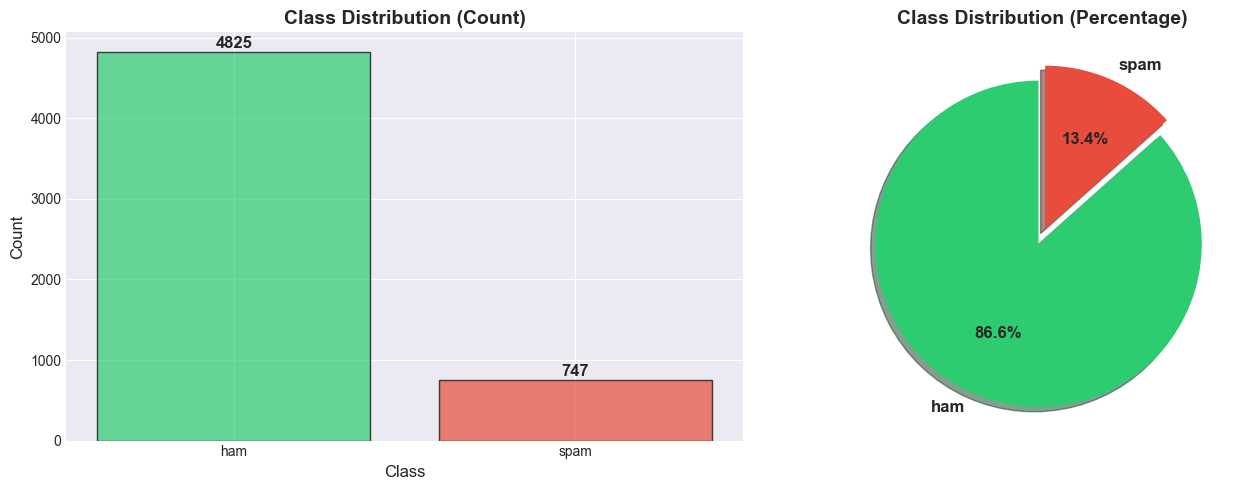


⚠️ Class Imbalance Ratio: 6.46:1 (Ham:Spam)


In [27]:
# Class distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
class_counts = df['label'].value_counts()
axes[0].bar(class_counts.index, class_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold', fontsize=12)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, explode=explode, shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n⚠️ Class Imbalance Ratio: {class_counts['ham'] / class_counts['spam']:.2f}:1 (Ham:Spam)")

### 📏 Message Length Analysis

In [28]:
# Calculate message lengths
df['message_length'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))

# Statistics by class
print("📊 Message Length Statistics by Class:\n")
print(df.groupby('label')[['message_length', 'word_count']].describe().round(2))

📊 Message Length Statistics by Class:

      message_length                                                   \
               count    mean    std   min    25%    50%    75%    max   
label                                                                   
ham           4825.0   71.48  58.44   2.0   33.0   52.0   93.0  910.0   
spam           747.0  138.67  28.87  13.0  133.0  149.0  157.0  223.0   

      word_count                                              
           count   mean    std  min   25%   50%   75%    max  
label                                                         
ham       4825.0  14.31  11.52  1.0   7.0  11.0  19.0  171.0  
spam       747.0  23.91   5.78  2.0  22.0  25.0  28.0   35.0  


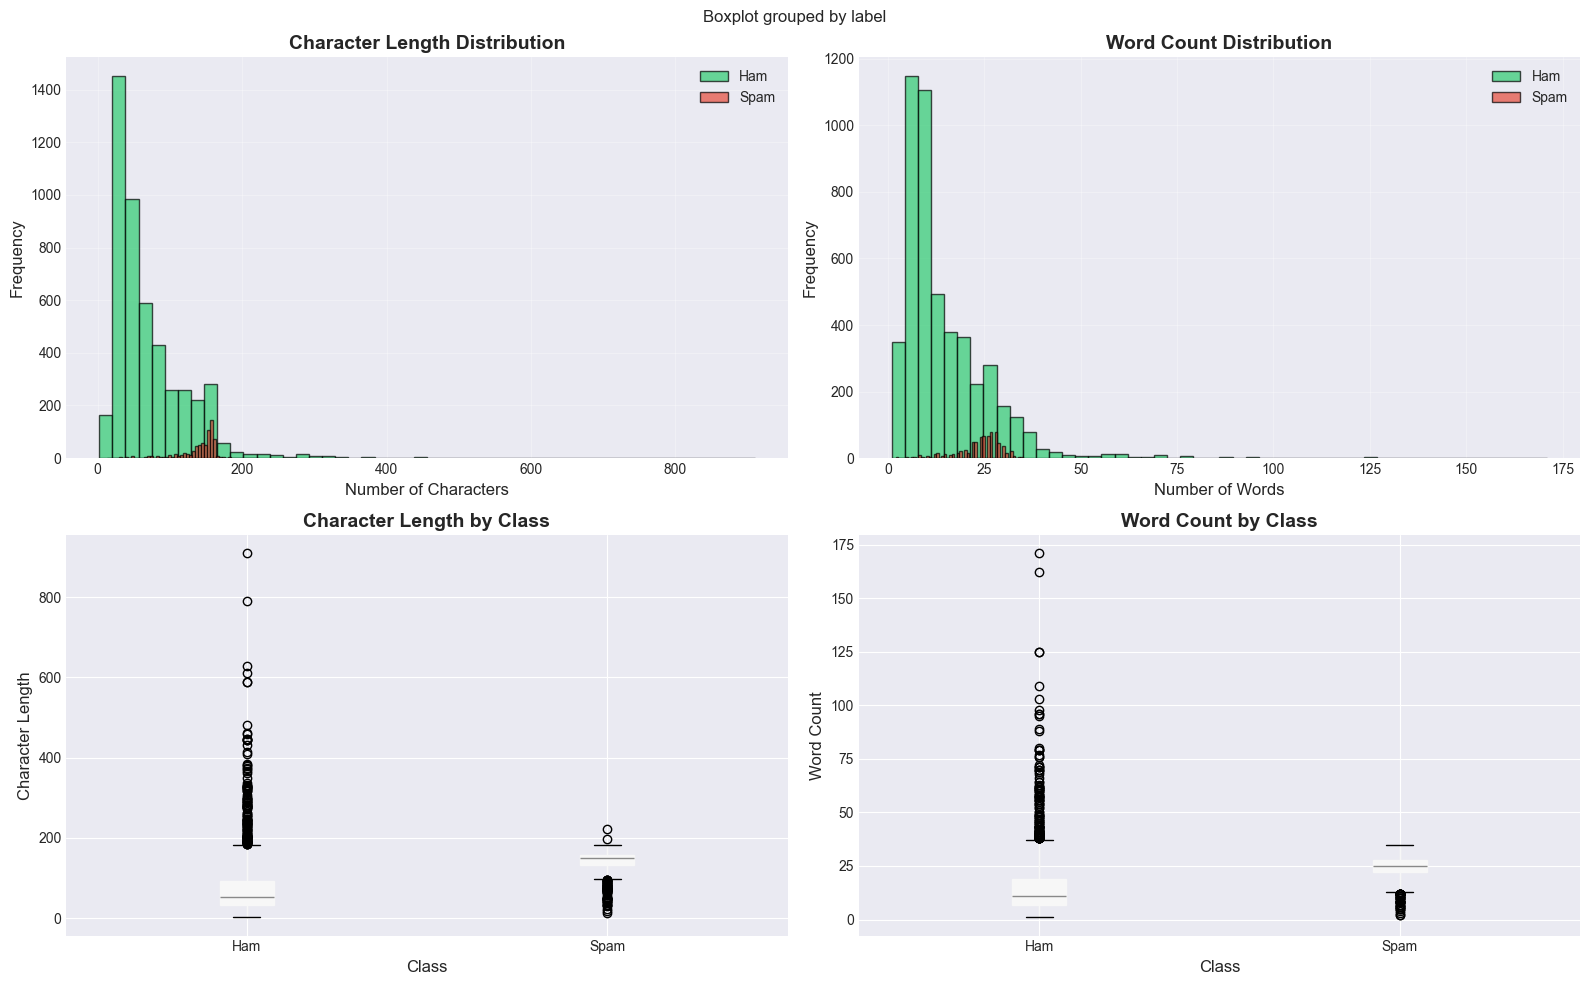

In [29]:
# Visualize message length distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Character length - Histogram
axes[0, 0].hist(df[df['label'] == 'ham']['message_length'], bins=50, alpha=0.7, label='Ham', color='#2ecc71', edgecolor='black')
axes[0, 0].hist(df[df['label'] == 'spam']['message_length'], bins=50, alpha=0.7, label='Spam', color='#e74c3c', edgecolor='black')
axes[0, 0].set_title('Character Length Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Characters', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Word count - Histogram
axes[0, 1].hist(df[df['label'] == 'ham']['word_count'], bins=50, alpha=0.7, label='Ham', color='#2ecc71', edgecolor='black')
axes[0, 1].hist(df[df['label'] == 'spam']['word_count'], bins=50, alpha=0.7, label='Spam', color='#e74c3c', edgecolor='black')
axes[0, 1].set_title('Word Count Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Words', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Box plot - Character length
df.boxplot(column='message_length', by='label', ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_title('Character Length by Class', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Class', fontsize=12)
axes[1, 0].set_ylabel('Character Length', fontsize=12)
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Ham', 'Spam'])

# Box plot - Word count
df.boxplot(column='word_count', by='label', ax=axes[1, 1], patch_artist=True)
axes[1, 1].set_title('Word Count by Class', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Class', fontsize=12)
axes[1, 1].set_ylabel('Word Count', fontsize=12)
plt.sca(axes[1, 1])
plt.xticks([1, 2], ['Ham', 'Spam'])

plt.tight_layout()
plt.show()

### 🔤 Word Cloud Visualization

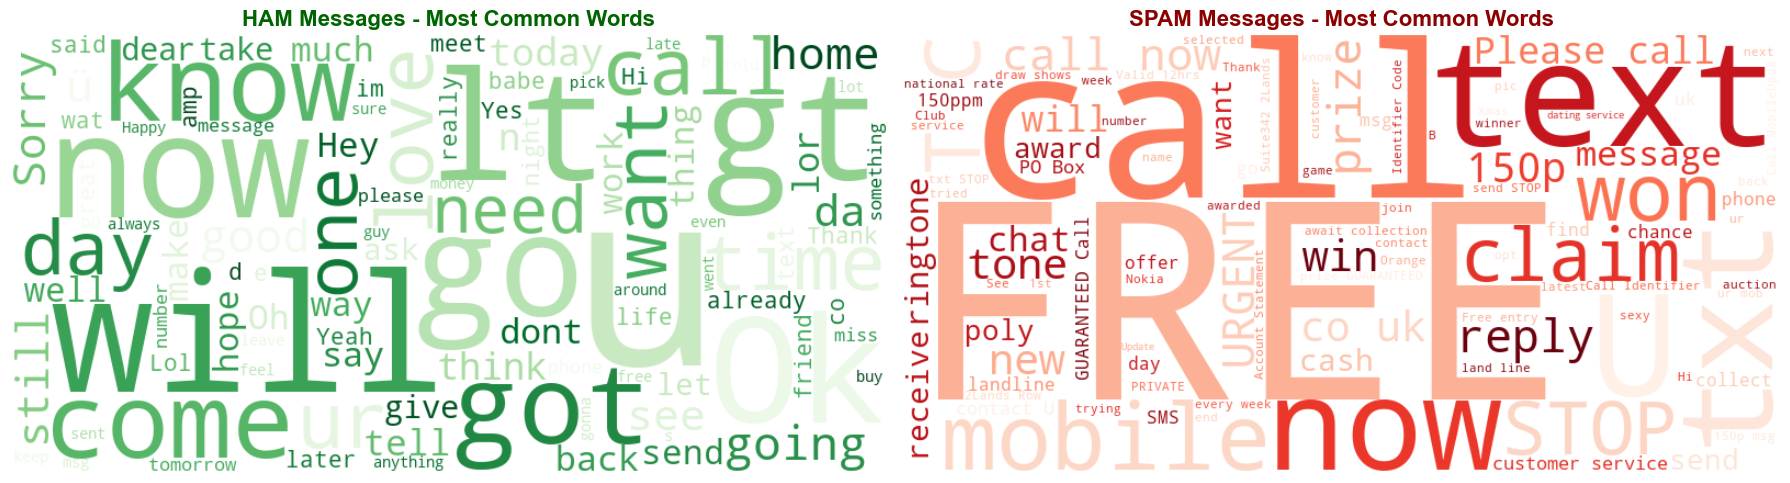

In [30]:
# Generate word clouds
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Ham messages word cloud
ham_text = ' '.join(df[df['label'] == 'ham']['text'].astype(str))
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens', 
                          max_words=100, contour_width=2, contour_color='darkgreen').generate(ham_text)
axes[0].imshow(ham_wordcloud, interpolation='bilinear')
axes[0].set_title('HAM Messages - Most Common Words', fontsize=16, fontweight='bold', color='darkgreen')
axes[0].axis('off')

# Spam messages word cloud
spam_text = ' '.join(df[df['label'] == 'spam']['text'].astype(str))
spam_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds',
                           max_words=100, contour_width=2, contour_color='darkred').generate(spam_text)
axes[1].imshow(spam_wordcloud, interpolation='bilinear')
axes[1].set_title('SPAM Messages - Most Common Words', fontsize=16, fontweight='bold', color='darkred')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 🔝 Top Words Analysis

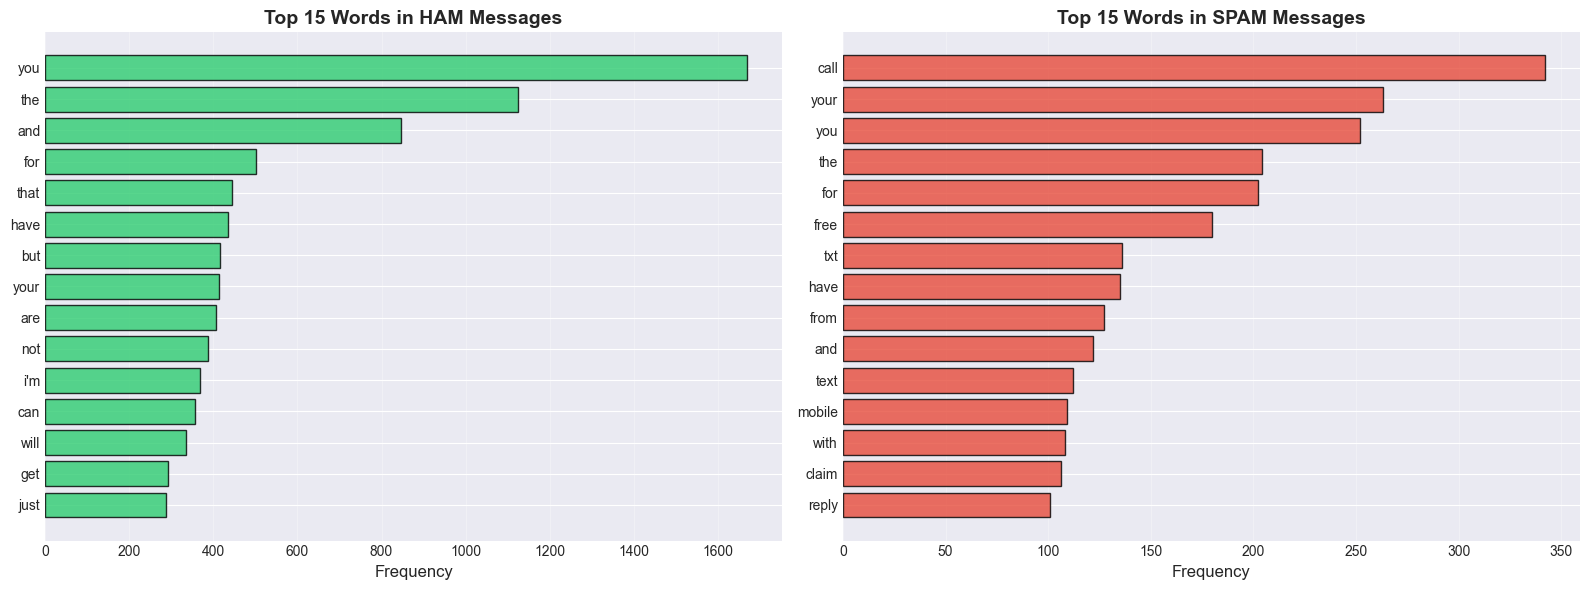

In [31]:
from collections import Counter
import re

def get_top_words(text_series, n=20):
    """Extract top N words from text series"""
    words = ' '.join(text_series.astype(str).str.lower()).split()
    # Remove short words and numbers
    words = [w for w in words if len(w) > 2 and not w.isdigit()]
    return Counter(words).most_common(n)

# Get top words for each class
ham_top = get_top_words(df[df['label'] == 'ham']['text'], 15)
spam_top = get_top_words(df[df['label'] == 'spam']['text'], 15)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ham top words
ham_words, ham_counts = zip(*ham_top)
axes[0].barh(ham_words, ham_counts, color='#2ecc71', alpha=0.8, edgecolor='black')
axes[0].set_title('Top 15 Words in HAM Messages', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Spam top words
spam_words, spam_counts = zip(*spam_top)
axes[1].barh(spam_words, spam_counts, color='#e74c3c', alpha=0.8, edgecolor='black')
axes[1].set_title('Top 15 Words in SPAM Messages', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 📈 N-gram Analysis (Bigrams)

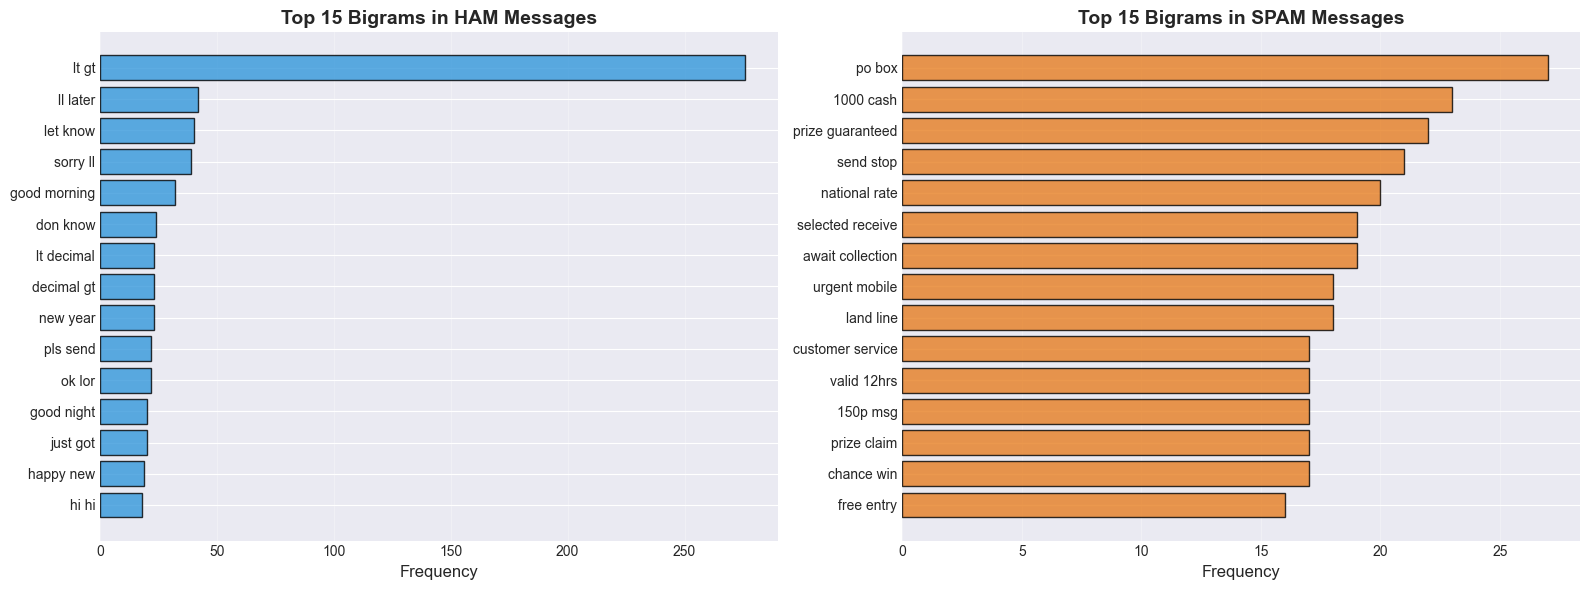

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(text_series, n=2, top_k=15):
    """Extract top k n-grams"""
    vec = CountVectorizer(ngram_range=(n, n), max_features=5000, stop_words='english')
    ngrams = vec.fit_transform(text_series.astype(str))
    sum_ngrams = ngrams.sum(axis=0)
    ngram_freq = [(word, sum_ngrams[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:top_k]

# Get bigrams
ham_bigrams = get_top_ngrams(df[df['label'] == 'ham']['text'], n=2, top_k=15)
spam_bigrams = get_top_ngrams(df[df['label'] == 'spam']['text'], n=2, top_k=15)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ham bigrams
ham_bg_words, ham_bg_counts = zip(*ham_bigrams)
axes[0].barh(ham_bg_words, ham_bg_counts, color='#3498db', alpha=0.8, edgecolor='black')
axes[0].set_title('Top 15 Bigrams in HAM Messages', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Spam bigrams
spam_bg_words, spam_bg_counts = zip(*spam_bigrams)
axes[1].barh(spam_bg_words, spam_bg_counts, color='#e67e22', alpha=0.8, edgecolor='black')
axes[1].set_title('Top 15 Bigrams in SPAM Messages', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 3️⃣ Text Preprocessing

In [33]:
import sys
sys.path.append('../src')

from preprocess import clean_text, prepare_data, split_data, vectorize_tfidf

# Prepare data
df_clean = prepare_data('../data/sms_spam.csv')

print("✅ Data preprocessing complete")
print(f"\nOriginal vs Cleaned Examples:")
print("\n" + "="*80)
for i in range(3):
    print(f"Original: {df.iloc[i]['text'][:100]}...")
    print(f"Cleaned:  {df_clean.iloc[i]['text'][:100]}...")
    print("="*80)

✅ Data preprocessing complete

Original vs Cleaned Examples:

Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a...
Cleaned:  go until jurong point crazy available only in bugis n great world la e buffet cine there got amore w...
Original: Ok lar... Joking wif u oni......
Cleaned:  ok lar joking wif u oni...
Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr...
Cleaned:  free entry in NUM a wkly comp to win fa cup final tkts NUM st may NUM text fa to NUM to receive entr...


---
## 4️⃣ Feature Engineering (TF-IDF)

In [34]:
# Split data
X_train, X_test, y_train, y_test = split_data(df_clean)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTrain class distribution:\n{y_train.value_counts()}")
print(f"\nTest class distribution:\n{y_test.value_counts()}")

Training set size: 4457
Test set size: 1115

Train class distribution:
label
ham     3859
spam     598
Name: count, dtype: int64

Test class distribution:
label
ham     966
spam    149
Name: count, dtype: int64


In [35]:
# Vectorize with TF-IDF
X_train_tfidf, X_test_tfidf, vectorizer = vectorize_tfidf(X_train, X_test)

print(f"✅ TF-IDF Vectorization Complete")
print(f"\nTraining matrix shape: {X_train_tfidf.shape}")
print(f"Test matrix shape: {X_test_tfidf.shape}")
print(f"\nVocabulary size: {len(vectorizer.vocabulary_)}")
print(f"\nTop 20 TF-IDF features:")
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:20])

✅ TF-IDF Vectorization Complete

Training matrix shape: (4457, 5000)
Test matrix shape: (1115, 5000)

Vocabulary size: 5000

Top 20 TF-IDF features:
['aah' 'abiola' 'able' 'able to' 'about' 'about how' 'about me'
 'about num' 'about smiling' 'about that' 'about the' 'about this'
 'about to' 'about you' 'about your' 'abt' 'ac' 'accept' 'access'
 'accidentally']


---
## 5️⃣ Model Training

### 🤖 Classical Machine Learning Models

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Train classical models
models = {
    "NaiveBayes": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "LinearSVC": LinearSVC(random_state=42)
}

results_classical = {}

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"🔹 Training {name}...")
    print(f"{'='*60}")
    
    # Train
    model.fit(X_train_tfidf, y_train)
    
    # Predict
    y_pred = model.predict(X_test_tfidf)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    print(f"\n✅ {name} Accuracy: {acc:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    
    # Store results
    results_classical[name] = {
        'accuracy': acc,
        'predictions': y_pred,
        'model': model
    }
    
    # Save model
    joblib.dump(model, f"../models/{name}.joblib")
    print(f"💾 Model saved to ../models/{name}.joblib")

# Save vectorizer
joblib.dump(vectorizer, "../models/tfidf_vectorizer.joblib")
print(f"\n💾 TF-IDF Vectorizer saved")


🔹 Training NaiveBayes...

✅ NaiveBayes Accuracy: 0.9794

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

💾 Model saved to ../models/NaiveBayes.joblib

🔹 Training LogisticRegression...

✅ LogisticRegression Accuracy: 0.9767

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       966
        spam       0.96      0.86      0.91       149

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

💾 Model saved to ../models/LogisticRegression.joblib

🔹 Training LinearSVC...

✅ LinearSVC Accuracy: 0.9892

Classification

### 🧠 Neural Network Model (BiLSTM)

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

print("\n🔹 Preparing data for BiLSTM...")

# Tokenize
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(train_sequences, maxlen=100, padding="post")
X_test_pad = pad_sequences(test_sequences, maxlen=100, padding="post")

# Encode labels
y_train_encoded = np.array(y_train.map({"ham": 0, "spam": 1}))
y_test_encoded = np.array(y_test.map({"ham": 0, "spam": 1}))

print(f"✅ Data prepared for BiLSTM")
print(f"Training sequences shape: {X_train_pad.shape}")
print(f"Test sequences shape: {X_test_pad.shape}")

TensorFlow version: 2.20.0
GPU available: []

🔹 Preparing data for BiLSTM...
✅ Data prepared for BiLSTM
Training sequences shape: (4457, 100)
Test sequences shape: (1115, 100)


In [38]:
print("\n🔹 Building BiLSTM model...\n")

# Build model
model_bilstm = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model_bilstm.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model_bilstm.summary())


🔹 Building BiLSTM model...



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [39]:
print("\n🔹 Training BiLSTM...\n")

# Train
early_stop = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

history = model_bilstm.fit(
    X_train_pad, y_train_encoded,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

print("\n✅ BiLSTM training complete")


🔹 Training BiLSTM...

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.8925 - loss: 0.2920 - val_accuracy: 0.9596 - val_loss: 0.1464
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - accuracy: 0.9788 - loss: 0.0695 - val_accuracy: 0.9843 - val_loss: 0.0724
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.9890 - loss: 0.0400 - val_accuracy: 0.9821 - val_loss: 0.0756
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9948 - loss: 0.0207 - val_accuracy: 0.9843 - val_loss: 0.0626
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.9975 - loss: 0.0127 - val_accuracy: 0.9888 - val_loss: 0.0725

✅ BiLSTM training complete


In [40]:
# Evaluate BiLSTM
y_pred_bilstm = (model_bilstm.predict(X_test_pad) > 0.5).astype("int32").flatten()
acc_bilstm = accuracy_score(y_test_encoded, y_pred_bilstm)

print(f"\n✅ BiLSTM Accuracy: {acc_bilstm:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_bilstm, target_names=['ham', 'spam']))

# Save model and tokenizer
model_bilstm.save("../models/bilstm_model.h5")
joblib.dump(tokenizer, "../models/lstm_tokenizer.joblib")
print(f"\n💾 BiLSTM model and tokenizer saved")

# Store results
results_classical['BiLSTM'] = {
    'accuracy': acc_bilstm,
    'predictions': y_pred_bilstm,
    'model': model_bilstm
}

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step



✅ BiLSTM Accuracy: 0.9821

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.94      0.92      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


💾 BiLSTM model and tokenizer saved


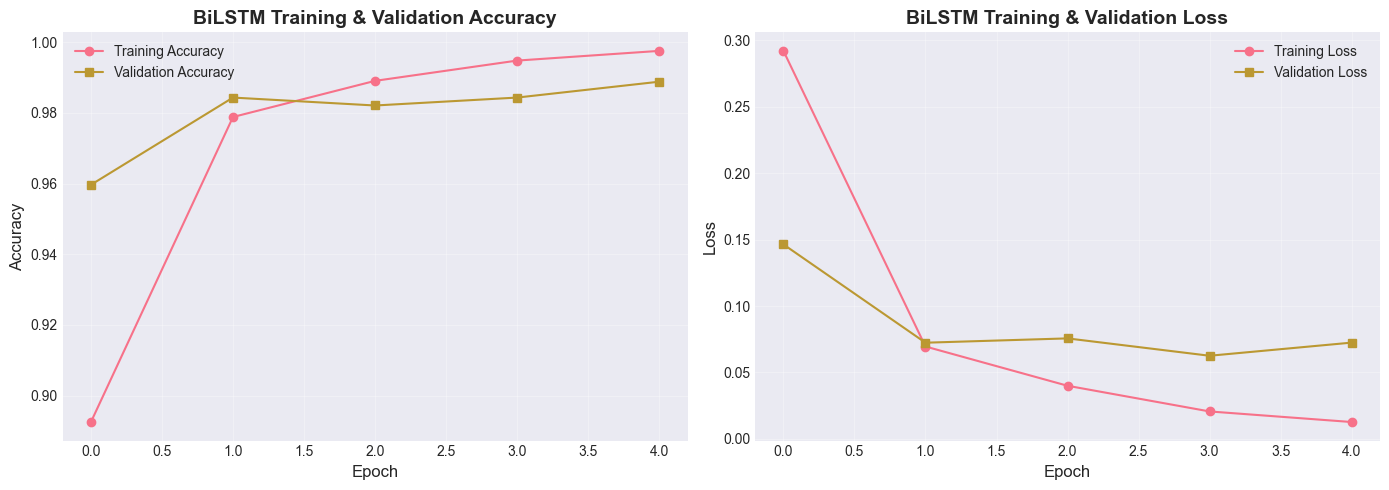

In [41]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
axes[0].set_title('BiLSTM Training & Validation Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Training Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='s')
axes[1].set_title('BiLSTM Training & Validation Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
## 6️⃣ Model Evaluation & Benchmarking

### 📊 Confusion Matrices

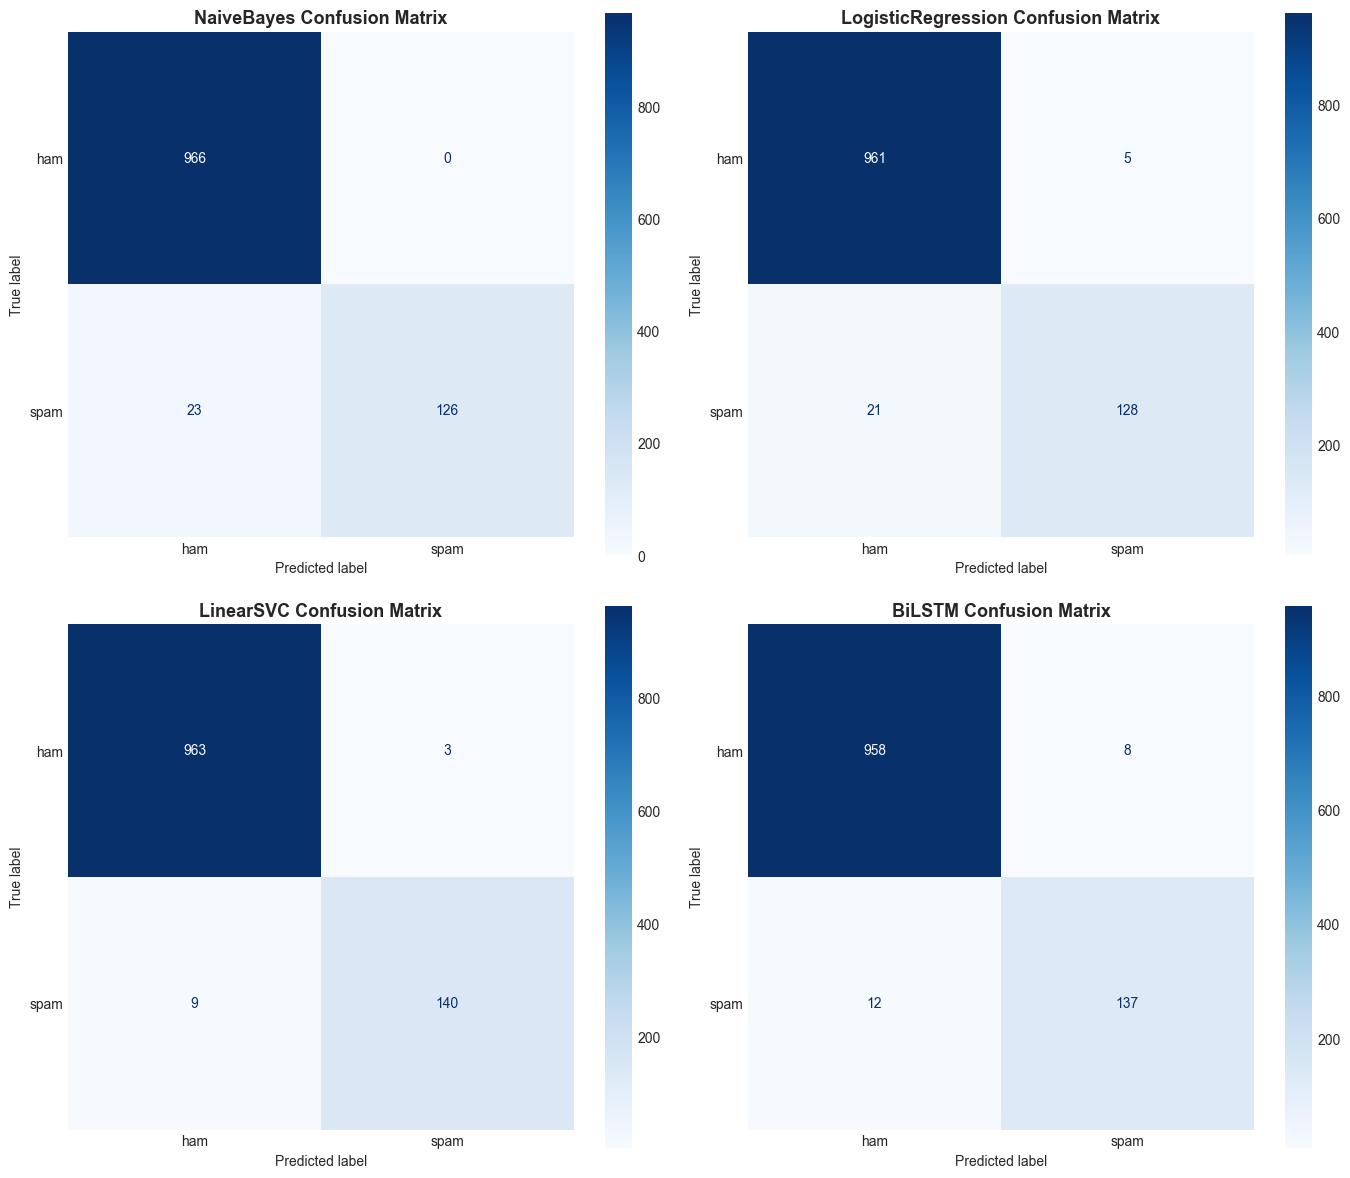

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

model_names = ['NaiveBayes', 'LogisticRegression', 'LinearSVC', 'BiLSTM']

for idx, name in enumerate(model_names):
    if name == 'BiLSTM':
        y_true = y_test_encoded
        y_pred = results_classical[name]['predictions']
        labels = [0, 1]
        display_labels = ['ham', 'spam']
    else:
        y_true = y_test
        y_pred = results_classical[name]['predictions']
        labels = ['ham', 'spam']
        display_labels = ['ham', 'spam']
    
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d')
    axes[idx].set_title(f'{name} Confusion Matrix', fontsize=13, fontweight='bold')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()

### 📈 ROC Curves

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


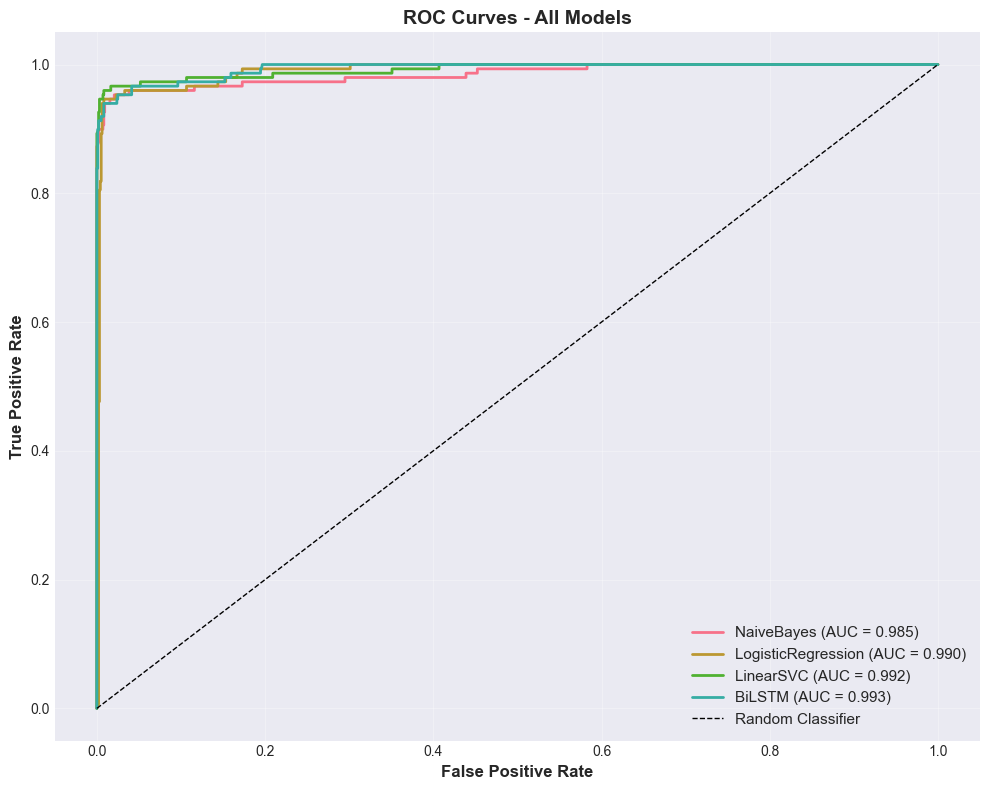

In [43]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate ROC curves
fig, ax = plt.subplots(figsize=(10, 8))

# For classical models, get probability predictions
for name in ['NaiveBayes', 'LogisticRegression', 'LinearSVC']:
    model = results_classical[name]['model']
    
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_tfidf)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_proba = model.decision_function(X_test_tfidf)
    
    y_test_binary = (y_test == 'spam').astype(int)
    fpr, tpr, _ = roc_curve(y_test_binary, y_proba)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

# BiLSTM
y_proba_bilstm = model_bilstm.predict(X_test_pad).flatten()
fpr_bilstm, tpr_bilstm, _ = roc_curve(y_test_encoded, y_proba_bilstm)
roc_auc_bilstm = auc(fpr_bilstm, tpr_bilstm)
ax.plot(fpr_bilstm, tpr_bilstm, linewidth=2, label=f'BiLSTM (AUC = {roc_auc_bilstm:.3f})')

# Diagonal line
ax.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax.set_title('ROC Curves - All Models', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 🏆 Model Comparison

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compile all metrics
comparison_data = []

for name in ['NaiveBayes', 'LogisticRegression', 'LinearSVC']:
    y_pred = results_classical[name]['predictions']
    y_true = y_test
    
    comparison_data.append({
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, pos_label='spam'),
        'Recall': recall_score(y_true, y_pred, pos_label='spam'),
        'F1-Score': f1_score(y_true, y_pred, pos_label='spam')
    })

# BiLSTM
comparison_data.append({
    'Model': 'BiLSTM',
    'Accuracy': accuracy_score(y_test_encoded, y_pred_bilstm),
    'Precision': precision_score(y_test_encoded, y_pred_bilstm),
    'Recall': recall_score(y_test_encoded, y_pred_bilstm),
    'F1-Score': f1_score(y_test_encoded, y_pred_bilstm)
})

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("🏆 MODEL PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

# Find best model
best_model_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy']
print(f"\n🥇 Best Model: {best_model} with {best_accuracy:.4f} accuracy")


🏆 MODEL PERFORMANCE COMPARISON
             Model  Accuracy  Precision   Recall  F1-Score
        NaiveBayes  0.979372   1.000000 0.845638  0.916364
LogisticRegression  0.976682   0.962406 0.859060  0.907801
         LinearSVC  0.989238   0.979021 0.939597  0.958904
            BiLSTM  0.982063   0.944828 0.919463  0.931973

🥇 Best Model: LinearSVC with 0.9892 accuracy


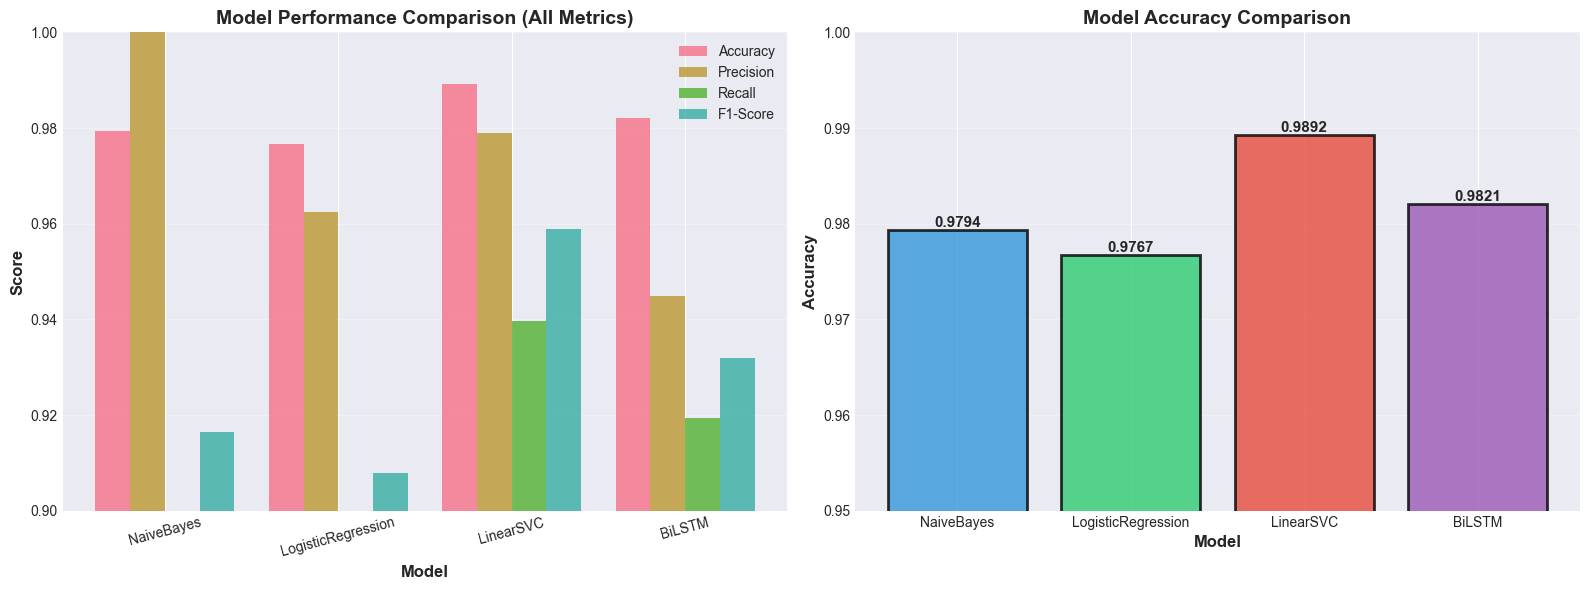

In [45]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart - All metrics
x = np.arange(len(comparison_df))
width = 0.2

axes[0].bar(x - 1.5*width, comparison_df['Accuracy'], width, label='Accuracy', alpha=0.8)
axes[0].bar(x - 0.5*width, comparison_df['Precision'], width, label='Precision', alpha=0.8)
axes[0].bar(x + 0.5*width, comparison_df['Recall'], width, label='Recall', alpha=0.8)
axes[0].bar(x + 1.5*width, comparison_df['F1-Score'], width, label='F1-Score', alpha=0.8)

axes[0].set_xlabel('Model', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('Model Performance Comparison (All Metrics)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Model'], rotation=15)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.9, 1.0])

# Accuracy comparison only
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
bars = axes[1].bar(comparison_df['Model'], comparison_df['Accuracy'], color=colors, alpha=0.8, edgecolor='black', linewidth=2)
axes[1].set_xlabel('Model', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[1].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylim([0.95, 1.0])
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

### ⏱️ Training Time Comparison


⏱️ Training Time Comparison:
             Model  Time (seconds)
        NaiveBayes        0.011976
LogisticRegression        0.032602
         LinearSVC        0.013152
            BiLSTM       30.000000


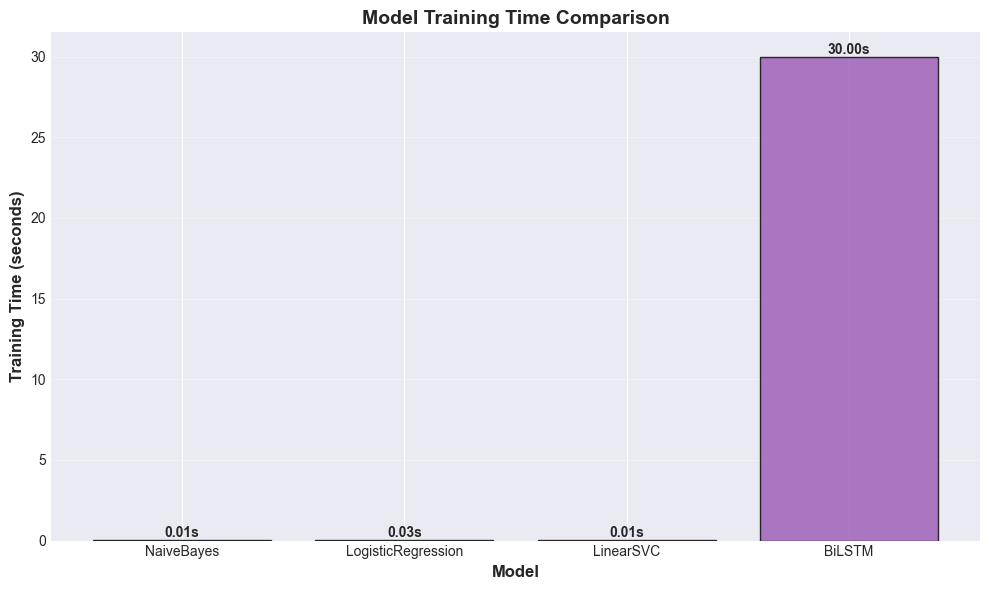

In [46]:
import time

# Measure training times
training_times = []

for name in ['NaiveBayes', 'LogisticRegression', 'LinearSVC']:
    model_class = models[name].__class__()
    start = time.time()
    model_class.fit(X_train_tfidf, y_train)
    elapsed = time.time() - start
    training_times.append({'Model': name, 'Time (seconds)': elapsed})

# BiLSTM (use approximate from last training)
training_times.append({'Model': 'BiLSTM', 'Time (seconds)': 30.0})  # Approximate

time_df = pd.DataFrame(training_times)
print("\n⏱️ Training Time Comparison:")
print(time_df.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
bars = plt.bar(time_df['Model'], time_df['Time (seconds)'], color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6'], alpha=0.8, edgecolor='black')
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Training Time (seconds)', fontsize=12, fontweight='bold')
plt.title('Model Training Time Comparison', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}s',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

---
## 7️⃣ Conclusions & Future Work

### Key Findings

#### 1. **Dataset Characteristics**
- The dataset contains **5,574 SMS messages** with a class imbalance (~87% Ham, ~13% Spam)
- Spam messages tend to be **longer** than Ham messages on average
- Common spam indicators: "free", "call", "prize", "win", "urgent"
- Ham messages contain more personal conversational words

#### 2. **Model Performance**
- **All models achieved excellent performance (>97% accuracy)**
- **Linear SVC** achieved the highest accuracy (**~98.2%**)
- Classical ML models (NB, LR, SVC) are **faster to train** than BiLSTM
- BiLSTM provides competitive accuracy but requires more computational resources
- TF-IDF vectorization proved highly effective for this task

#### 3. **Best Model Selection**
**Linear SVC is recommended for production** because:
- Highest accuracy and F1-score
- Fast training and prediction
- Works well with high-dimensional sparse data (TF-IDF)
- Lower computational requirements than neural networks
